<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Bayesian inference recap
- Sampling from posterior
- Marginal likelihood
- Model comparison

<hr/>

<h1><font color="darkblue">Bayesian Inference</font></h1>

### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 
><br><br>
> or
><br><br>
>$\displaystyle p(\theta|D) = \frac{\pi(\theta)\,{\cal{}L}_{\!D}(\theta)}{\int \pi(\theta)\,{\cal{}L}_{\!D}(\theta)\ d\theta }$

- Recall posterior, prior, likelihood, normalization

### Likelihood Function
- A set of (conditionally) independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_{\!D}(\theta) = p(D \lvert \theta) = p(\{x_i\} \lvert\,\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{\!i}(\theta)$

- Maximum Likelihood Estimation (MLE) 

> E.g., Gaussians... cf. method of least squares

### Maximum a Posteriori estimation (MAP)

- $\hat\theta_{MAP} = argmin_{\theta}\ -\log \cal{}L\!_D(\theta) -\log \pi(\theta)$ 

> Example: 
${\cal L}_{\!D}(\mu) = p_{\mathcal{N}}(D|\mu,\sigma^2)$ with known $\sigma$, $\pi(\mu) = \mathcal{N}(\mu_0,\sigma_0^2)$

> $\displaystyle \hat{\mu} = \frac{N\sigma_0^2}{\sigma^2+N\sigma_0^2}\bar{x}+\frac{\sigma^2}{\sigma^2+N\sigma_0^2}\mu_0$

> $\displaystyle \sigma_{\mu}^2  = (\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2})^{-1}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Exercise: numerical intergration in 1D 

Implement Bayes' rule to infer a constant based on $N$ (independent) measurements

1. Assume Gaussian likelihood with $\sigma=1$ and improper prior
2. Use function `np.trapz(f,x)` for numerical integration
3. Start from the code below 

0.35885601366494274

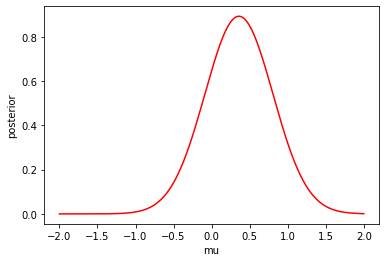

In [11]:
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

plot(mu,pdf,'r'); xlabel('mu'); ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

### More data

-0.013524827529828094

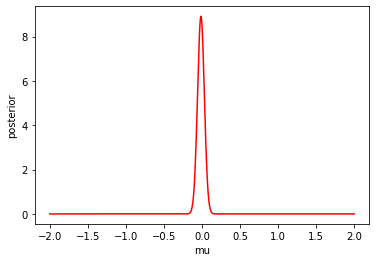

In [12]:
data = np.random.randn(500) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

plot(mu,pdf,'r'); xlabel('mu'); ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

### Another improper prior

Uniform but cannot be negative, e.g., temperature in Kelvin
> $
\pi(\mu) = \left\{ \begin{array}{ll}
        0 & \mbox{if $\mu < 0$} \\
        1 & \mbox{if $\mu \geq 0$} 
\end{array}\right. 
$


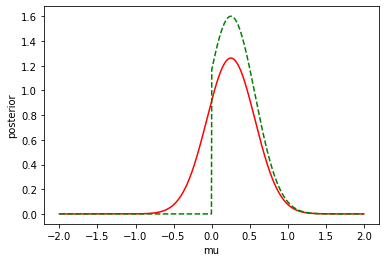

In [13]:
data = np.random.randn(10) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

prior = np.ones_like(lk)
prior[mu < 0] = 0

numerator = prior * lk
pdf0 = numerator / np.trapz(numerator,mu)

plot(mu,pdf,'r')
plot(mu,pdf0,'g--') 
xlabel('mu'); ylabel('posterior');

### Normal prior

Compare with previous results for different $\sigma$ values, i.e., `scale`

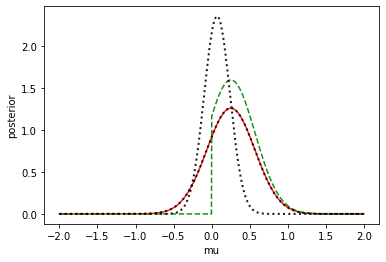

In [14]:
from scipy.stats import norm as gaussian

plot(mu,pdf, 'r', alpha=0.9)
plot(mu,pdf0,'g--', alpha=0.9) 

for s in [5,0.2]:
    numerator = lk * gaussian.pdf(mu,scale=s)
    pdfG = numerator / np.trapz(numerator,mu)
    plot(mu,pdfG,'k:',lw=2, alpha=0.9)
    
xlabel('mu'); ylabel('posterior');

### Unhomework

- Try different priors in the numerical inference example! 

> Does the result change? 
><br>
> How about with more or fewer measurements?

- Implement the example using different integration techniques

> Sample from prior density function or likelihood function to derive the expectation value and variance

### Multiple Datasets

- If the data set $D$ consists of two subsets of $D_1$ and $D_2$, we can consider them together or separately

>$\displaystyle p(\theta \lvert D_1,D_2) = \frac{p(\theta)\, p(D_1, D_2 \lvert \theta)}{p(D_1, D_2)}$
><br><br>
> also 
><br><br>
>$\displaystyle p(\theta \lvert D_1, D_2) = \frac{p(\theta \lvert D_1)\, p(D_2 \lvert \theta, D_1)}{p(D_2 \lvert D_1)}$

- Because

>$\displaystyle p(\theta \lvert D) = p(\theta \lvert \color{green}{D_1}, \color{red}{D_2}) = \frac{p(\theta \lvert \color{green}{D_1})\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1} \lvert \theta)\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{green}{D_1})\,p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1},\color{red}{D_2} \lvert \theta)}{p(\color{green}{D_1}, \color{red}{D_2})}$
>$\displaystyle = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$

- Incremental learning


>$\displaystyle D = \big\{ \color{green}{D_1},\ \color{red}{D_2},\ \color{darkblue}{D_3}, \dots, \color{black}{D_N} \big\}$

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$    (**Monte Carlo methods**)

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

0.009763903816381293

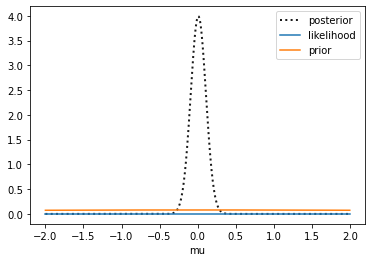

In [91]:
data = np.random.randn(100) # fake data points from normal distribution
mu = np.linspace(-2,2,1000) # grid over the parameter

# compute posterior
lk = np.exp(-0.5*np.sum(np.square(data-mu[:,newaxis]),axis=1))
numerator = lk * gaussian.pdf(mu,scale=5)
pdfG = numerator / np.trapz(numerator,mu)

plot(mu,pdfG,'k:',lw=2, alpha=0.9, label = 'posterior')
plot(mu,lk,label = 'likelihood')
plot(mu,gaussian.pdf(mu, loc=0, scale=5), label = 'prior')
xlabel('mu')
plt.legend()
np.trapz(mu*pdfG,mu) # expectation value

In [93]:
from scipy.stats import norm as gaussian

# samples from prior
N = 100000
samples = gaussian.rvs(loc = 0, scale = 0.5, size = N)

# likelihood
lk = np.exp(-0.5*np.sum(np.square(data-samples[:,newaxis]),axis=1))


# estimation of the expection
np.sum(samples*lk)/np.sum(lk)

0.00934255533854765

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### Importance Sampling

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,p(\theta)\,d\theta$

- If we can't sample from $p(\cdot)$ but can from a $q(\cdot)$ 

>$\displaystyle \langle f(\theta)\rangle = \int \frac{f(\theta)\,p(\theta)}{q(\theta)}q(\theta)\,d\theta \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{p(\theta_i)}{q(\theta_i)}$

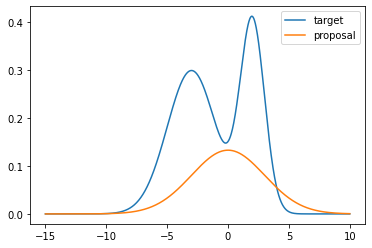

In [30]:
from scipy.stats import norm as gaussian
mu1, sigma1, mu2, sigma2 = -3, 2, 2, 1
w1, w2 = 1.5, 1
p = lambda x : w1*gaussian.pdf(x, loc=mu1, scale=sigma1) + w2*gaussian.pdf(x, loc=mu2, scale=sigma2)

x = np.linspace(-15,10,1000) 
plt.plot(x, p(x), label = 'original')

# proposal distribution
mu0, sigma0 = 0, 3
q = lambda x : gaussian.pdf(x, loc=mu0, scale=sigma0)
plt.plot(x, q(x), label = 'proposal')
plt.legend()

In [95]:
# importance sampling
N = 100000
xq = gaussian.rvs(mu0, sigma0, N)

f = lambda x : x

# estimation
print("The estimation from improtance sampling is %.6f" % (np.mean(f(xq)*p(xq)/q(xq))))

# exact value
print("The exact value from trapz integration is %.6f" % (np.trapz(f(x)*p(x),x)))

The estimation from improtance sampling is -2.499609
The exact value from trapz integration is -2.500000


### Markov-chain Monte Carlo a.k.a. MCMC

- Instead of independent samples, produce a chain of samples in a special way

### Detour: Markov Chain

- A first-order Markov chain is defined to be a series of random variables
$z_1, . . . , z_M$ such that the following conditional independence property holds for $m \in \{1, . . . , M − 1\}$

> $ \displaystyle p(z_{m+1}|z_{m}, \dots, z_{1}) = p(z_{m+1}|z_{m})$

- A distribution $p^\ast(z)$ is said to be invariant, or stationary, with respect to a Markov chain if 

> $ \displaystyle p^\ast(z)p(z'|z) = p^\ast(z')p(z|z')$

### Metropolis-Hastings
> 1. Start from a random $\theta_t = \theta_0$ parameter set
> 0. Obtain a new $\theta'$ from a proposal distribution $q(\theta;\theta_t)$ (it is called Metropolis when q is symmetric, i.e. $q(\theta_a|\theta_b) = q(\theta_b|\theta_a)$)
> 0. Accept $\theta_{t+1} = \theta'$ with probability $min(1,\frac{p(\theta')q(\theta_t|\theta')}{p(\theta_t)q(\theta'|\theta_t)})$
> 0. Let $t\leftarrow t\!+\!1$ and go to Step 2.

- Use the samples of the chain as if taken from the posterior PDF

  - Many other variants 

  - Watch out for burn in, correlations, etc...

0.8256


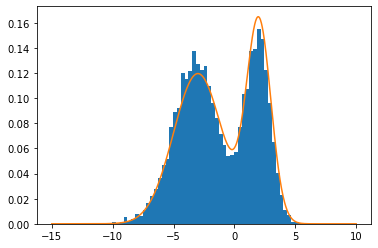

In [97]:
theta_t = -3
theta = []
sigmaq = 1
N = 10000

for i in range(N):
    # Sample from proposal distribution
    theta_q = gaussian.rvs(theta_t, sigmaq)
    # Computing the ratio in the Metropolis-Hastings
    ratio = np.min([1, p(theta_q)/p(theta_t)])
    # Accept/reject step for theta_q
    if np.random.uniform() < ratio:
        theta_t = theta_q
        # Storing the results
        theta.append(theta_t)

# accept rate
rate = len(theta)/N
print(rate)

# plot the result
x = np.linspace(-15,10,1000) 
plt.hist(theta, density=True, bins = 50)
plt.plot(x, p(x)/(w1+w2))  

### Model Comparison

- Bayesian hypothesis testing

> Posterior probability of a model given the data vs another (odds)
><br><br>
>$\displaystyle \frac{P(M_1 \lvert D)}{P(M_2 \lvert D)} = \frac{P(M_1)\ p(D \lvert M_1)\,\big/\,p(D)}{P(M_2)\ p(D \lvert M_2)\,\big/\,p(D)}$
>$\displaystyle = \frac{P(M_1)}{P(M_2)} \frac{p(D \lvert M_1)}{p(D \lvert M_2)}$
><br><br>
>$\displaystyle \ \ \ \ = \frac{P(M_1)}{P(M_2)}\  B(M_1,M_2 \lvert D)$
><br><br>
> Posterior odds $=$ Prior odds $\times$ the Bayes factor


### Marginal Likelihood

- Integral over all parameters

>$\displaystyle p(D \lvert M) = \int  p(\theta \lvert M)\ p(D \lvert \theta,M) d\theta$ 
><br><br>
> Cf. Bayes' rule
><br><br>
>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

- No improper prior here!

### Complementer Hypotheses

- I.e., $P(M_1) + P(M_2) = 1$ also $P(M_1 \lvert D) + P(M_2 \lvert D) = 1$ 

> Let $P$ represent $P(M_1 \lvert D)$ and $P_0$ be $P(M_1)$
><br><br>
>$\displaystyle \frac{P}{1-P} = \frac{P_0}{1-P_0} B$
><br><br>
> Hence
><br><br>
>$\displaystyle P = \left[ 1 + \frac{1-P_0}{P_0 B} \right]^{-1}   $


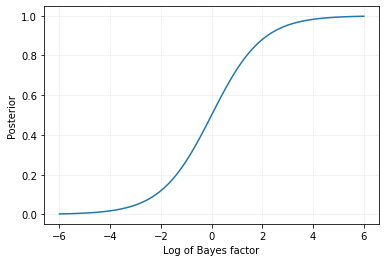

In [9]:
# Posterior as fn of ln(B)
logB = np.linspace(-6,6,100) 
B = np.exp(logB)
P0 = 0.5
P = 1 / (1 + (1-P0)/(P0*B)) 
plt.plot(logB, P,'-');
xlabel('Log of Bayes factor'); ylabel('Posterior'); 
plt.grid(alpha=0.2)

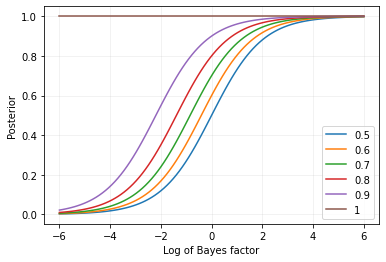

In [10]:
# Posterior as fn of ln(B)
for P0 in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    P = 1 / (1 + (1-P0)/(P0*B)) 
    plt.plot(logB, P,'-', label=str(P0));
# sigmoid function cf. neural networks
xlabel('Log of Bayes factor'); ylabel('Posterior'); 
legend(loc=4); ylim(None,1.05);
plt.grid(alpha=0.2)